Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russia=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/russia-investigation/russia-investigation.csv')
print(russia.shape)
russia.sample(10)

(194, 13)


,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president
48,watergate,1973-05-19,1977-06-19,1492,Francis X. Carroll,374.0,guilty-plea,1974-05-28,374.0,False,False,True,Richard Nixon
159,plame,2003-12-31,2007-03-06,1161,"I. Lewis ""Scooter"" Libby",1161.0,conviction,2007-03-06,1161.0,False,True,True,George W. Bush
193,russia,2017-05-17,NaN,659,Roger Stone,618.0,indictment,NaN,NaN,False,False,True,Donald Trump
170,russia,2017-05-17,NaN,659,Russian national 7,275.0,indictment,NaN,NaN,False,False,False,Donald Trump
176,russia,2017-05-17,NaN,659,Russian national 13,275.0,indictment,NaN,NaN,False,False,False,Donald Trump
101,pierce,1990-03-01,1998-10-27,3162,Thomas Demery,831.0,guilty-plea,1993-06-17,1204.0,False,False,True,George H.W. Bush
155,eli-segal,1996-11-27,1997-08-21,267,NaN,NaN,NaN,NaN,NaN,False,False,True,Bill Clinton
150,cisneros,1995-05-24,2004-08-31,3387,Allen Wooten,843.0,guilty-plea,1998-01-15,967.0,False,False,True,Bill Clinton
62,watergate,1973-05-19,1977-06-19,1492,Jack Chestnut,583.0,conviction,1975-05-08,719.0,False,False,True,Richard Nixon
18,watergate,1973-05-19,1977-06-19,1492,Jeb Magruder,89.0,guilty-plea,1973-08-16,89.0,False,False,True,Richard Nixon


In [ ]:
from IPython.display import display, Image

url=''

In [8]:
russia['investigation-start'].dtype

dtype('O')

In [9]:
russia.isnull().sum()

investigation           0
investigation-start     0
investigation-end      34
investigation-days      0
name                   13
indictment-days        13
type                   13
cp-date                68
cp-days                71
overturned              0
pardoned                0
american                0
president               0
dtype: int64

In [ ]:
# convert into appropriate data format datetime columns


In [24]:
russia.groupby('investigation')['investigation-days'].max().sort_values()

investigation
edwin-meese                       171
raymond-donovan                   178
hamilton-jordan                   181
waco                              226
eli-segal                         267
sealed-investigation-reagan       364
sealed-investigation-hwbush-2     453
sealed-investigation-hwbush-1     453
tim-kraft                         493
ron-brown                         497
wedtech                           522
bruce-babbitt                     651
russia                            659
herman                            682
ted-olson                        1056
bush-clinton-passport            1081
plame                            1161
deaver                           1175
watergate                        1494
espy                             2335
iran-contra                      2419
whitewater                       2770
pierce                           3162
cisneros                         3387
Name: investigation-days, dtype: int64

In [27]:
russia[russia['investigation']=='edwin-meese']

,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president
75,edwin-meese,1984-04-02,1984-09-20,171,NaN,NaN,NaN,NaN,NaN,False,False,True,Ronald Reagan


In [35]:
russia[russia['type'].isna()]['investigation'].unique()

array(['hamilton-jordan', 'tim-kraft', 'raymond-donovan', 'edwin-meese',
       'ted-olson', 'sealed-investigation-reagan',
       'sealed-investigation-hwbush-1', 'sealed-investigation-hwbush-2',
       'bush-clinton-passport', 'ron-brown', 'eli-segal', 'bruce-babbitt',
       'waco'], dtype=object)

In [34]:
russia[russia['name'].isna()]['investigation'].unique()

array(['hamilton-jordan', 'tim-kraft', 'raymond-donovan', 'edwin-meese',
       'ted-olson', 'sealed-investigation-reagan',
       'sealed-investigation-hwbush-1', 'sealed-investigation-hwbush-2',
       'bush-clinton-passport', 'ron-brown', 'eli-segal', 'bruce-babbitt',
       'waco'], dtype=object)

In [36]:
russia[russia['type'].isna()]['investigation'].unique()==russia[russia['name'].isna()]['investigation'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [4]:
empty_investigations=russia[russia['type'].isna()]['investigation'].unique().tolist()
empty_investigations

['hamilton-jordan',
 'tim-kraft',
 'raymond-donovan',
 'edwin-meese',
 'ted-olson',
 'sealed-investigation-reagan',
 'sealed-investigation-hwbush-1',
 'sealed-investigation-hwbush-2',
 'bush-clinton-passport',
 'ron-brown',
 'eli-segal',
 'bruce-babbitt',
 'waco']

In [5]:
rus=russia[np.invert(russia['investigation'].isin(empty_investigations))]
rus.head()

,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president
0,watergate,1973-05-19,1977-06-19,1492,James W. McCord,-246.0,conviction,1973-01-30,-109.0,False,False,True,Richard Nixon
1,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,-246.0,conviction,1973-01-15,-124.0,False,False,True,Richard Nixon
2,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon
3,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,-246.0,guilty-plea,1973-01-15,-124.0,False,True,True,Richard Nixon
4,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon


In [51]:
len(rus['investigation'].unique())

11

In [52]:
len(rus['name'].unique())

177

In [54]:
rus['type'].value_counts()

guilty-plea    86
indictment     56
conviction     39
Name: type, dtype: int64

In [58]:
rus.groupby('investigation')['investigation-days'].max().sort_values()

investigation
wedtech         522
russia          659
herman          682
plame          1161
deaver         1175
watergate      1494
espy           2335
iran-contra    2419
whitewater     2770
pierce         3162
cisneros       3387
Name: investigation-days, dtype: int64

In [59]:
rus['investigation-days']/365

0      4.087671
1      4.087671
2      4.087671
3      4.087671
4      4.087671
         ...   
189    1.805479
190    1.805479
191    1.805479
192    1.805479
193    1.805479
Name: investigation-days, Length: 181, dtype: float64

In [6]:
rus['investigation-years']=rus['investigation-days']/365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
rus.head()

,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president,investigation-years
0,watergate,1973-05-19,1977-06-19,1492,James W. McCord,-246.0,conviction,1973-01-30,-109.0,False,False,True,Richard Nixon,4.087671
1,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,-246.0,conviction,1973-01-15,-124.0,False,False,True,Richard Nixon,4.087671
2,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon,4.087671
3,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,-246.0,guilty-plea,1973-01-15,-124.0,False,True,True,Richard Nixon,4.087671
4,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon,4.087671


In [8]:
rus_plot=pd.DataFrame(rus.groupby('investigation')['investigation-years'].max().sort_values())
rus_plot=rus_plot.reset_index().copy()

In [9]:
rus_plot

,investigation,investigation-years
0,wedtech,1.430137
1,russia,1.805479
2,herman,1.868493
3,plame,3.180822
4,deaver,3.219178
5,watergate,4.093151
6,espy,6.397260
7,iran-contra,6.627397
8,whitewater,7.589041
9,pierce,8.663014


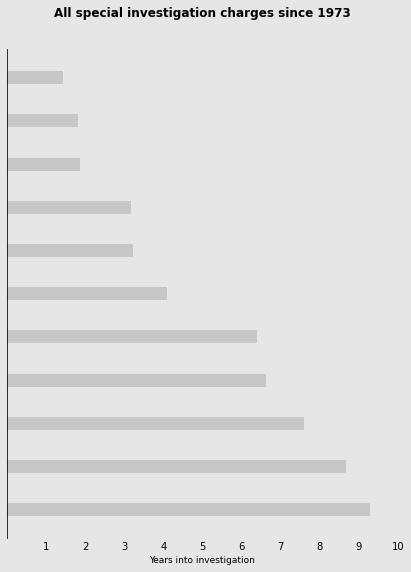

In [52]:
fig, ax = plt.subplots()

# fig background color
fig.set_figwidth(7)
fig.set_figheight(9)
fig.patch.set(facecolor="#e6e6e6")

# set the bar
ax.barh(y=range(1, 12), height=0.3, width=rus_plot['investigation-years'].sort_values(ascending=False), color="#c7c7c7")

# set axes background color
ax.set(facecolor="#e6e6e6")

# remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# set the title and the subtitle
ax.set_title("All special investigation charges since 1973",
             fontsize=12,
             #x=.35,
             y=1.054,
             fontweight="bold")

# set x axes label
ax.set_xlabel("Years into investigation", fontsize=9)

# fix x and y axes tickmarks and grid
#ax.set_xticklabels(range(1, 12), rotation=0)
ax.set_xticks(range(1, 11))
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
#ax.set_yticklabels(range(0, 12, 1))
#ax.set_yticks(range(0, 12, 1));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here